## Predict whether a patient is likely to get a heart stroke

In [1]:
# Task 1: Classification
# • Step 1: Loading Data, Data Pre-processing, EDA
# • Step 2: Feature Engineering, Creating Train, and Test Datasets
# • Step 3: Apply at least 4 algorithms (Training and Testing)
# • Step 4: Generate at least 4 Evaluation Metrics on each algorithm.
# • Step 5: Comparing the results.
# • Step 6: Fine Tune the best algorithm.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

## Step 1: Loading Data, Data Pre-processing, EDA

In [3]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
print("Dataset Shape: ", dataset.shape)
print()
print()
print()

print("Dataset Description: ", dataset.describe())


Dataset Shape:  (5110, 12)



Dataset Description:                   id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.

In [5]:
# columns
print("Columns: ", dataset.columns)
print()
print()
print()

# drop id column
dataset = dataset.drop(['id'], axis=1)


# numeric columns
numeric_columns = dataset.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric Columns: ", numeric_columns)
print()
print()
print()

# categorical columns
categorical_columns = dataset.select_dtypes(
	exclude=[np.number]).columns.tolist()
print("Categorical Columns: ", categorical_columns)

# missing values
missing_values = dataset.isnull().sum()
print("Missing Values: ", missing_values)

Columns:  Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')



Numeric Columns:  ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']



Categorical Columns:  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
Missing Values:  gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [6]:
# Data Pre-processing
# Handle missing values
dataset['bmi'].fillna(dataset['bmi'].mean(), inplace=True)

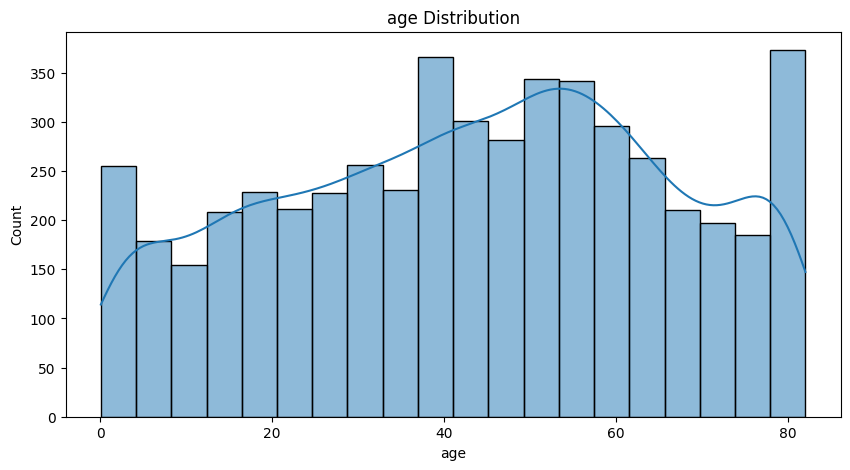

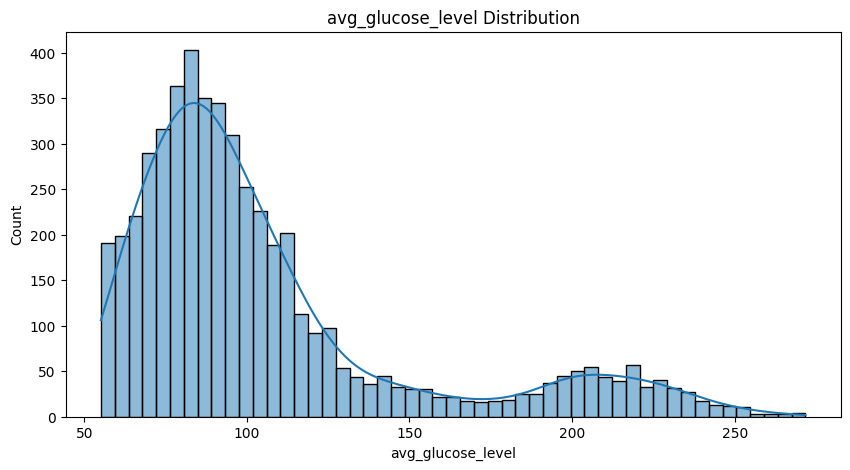

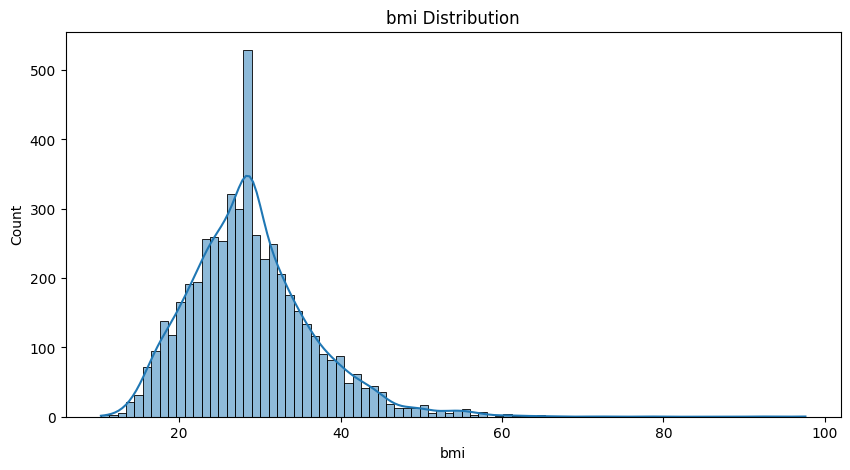

In [7]:
# Univariate analysis for the numeric columns

for column in ['age', 'avg_glucose_level', 'bmi']:
	plt.figure(figsize=(10, 5))
	sns.histplot(dataset[column], kde=True)
	plt.title(f'{column} Distribution')
	plt.show()

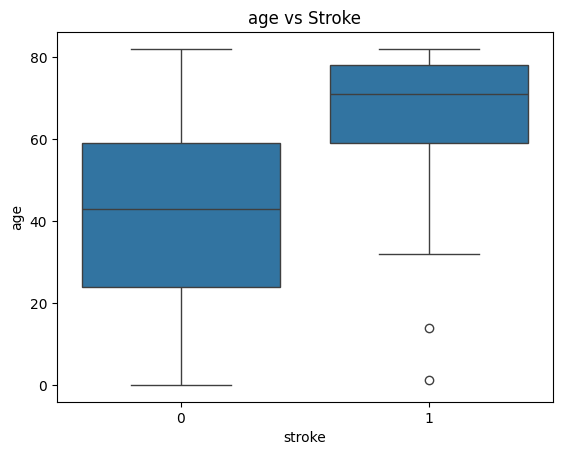

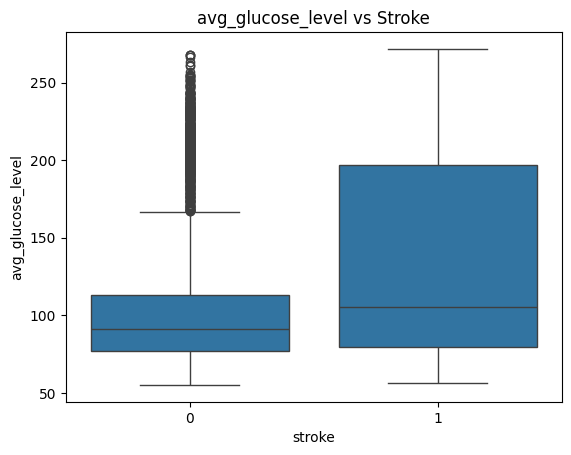

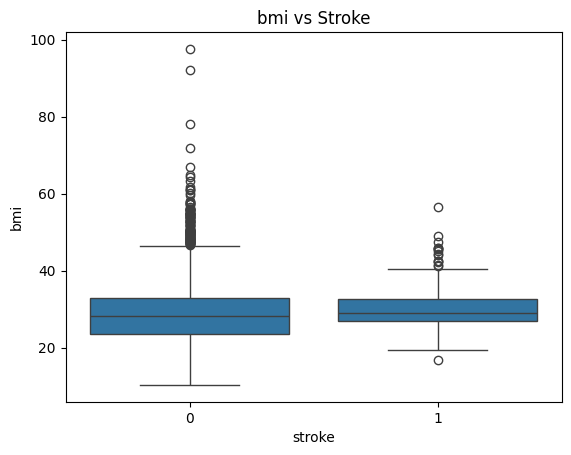

In [8]:
# Bivariate Analysis for the numeric columns

for column in ['age', 'avg_glucose_level', 'bmi']:
	sns.boxplot(x='stroke', y=column, data=dataset)
	plt.title(f'{column} vs Stroke')
	plt.show()

In [9]:
# Missing Values Analysis
missing_values = dataset.isnull().sum()
print(missing_values)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


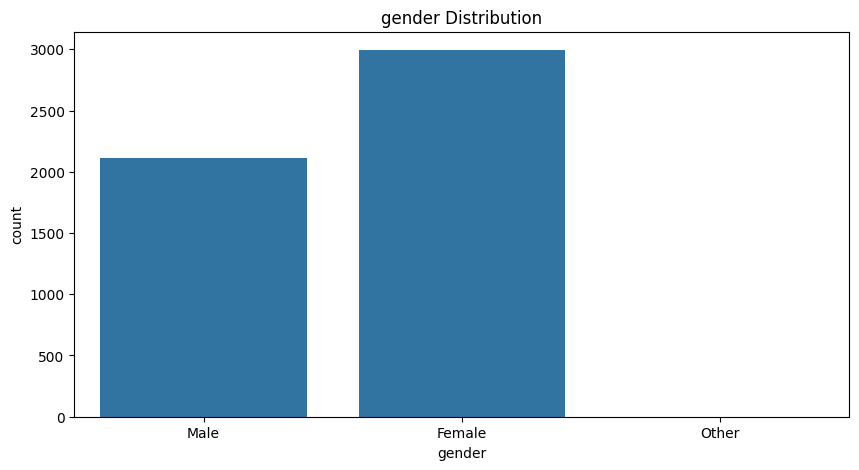

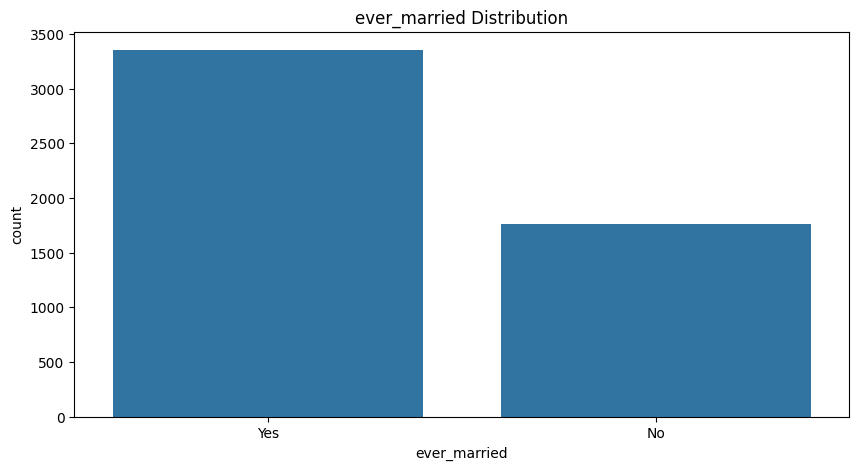

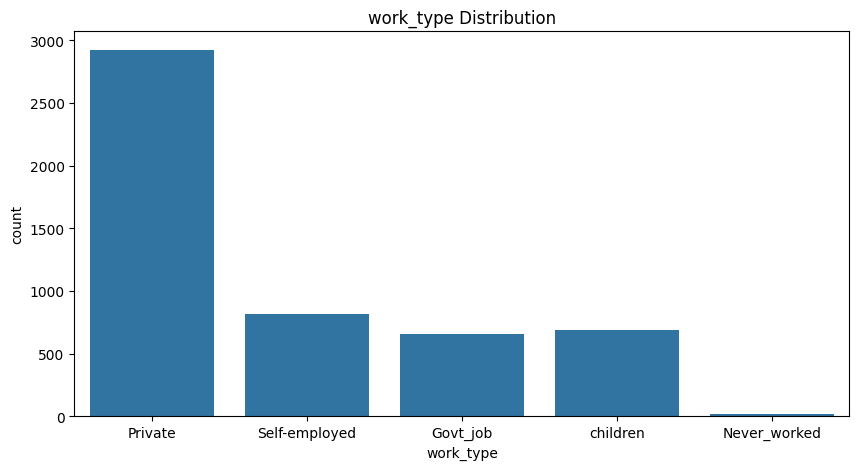

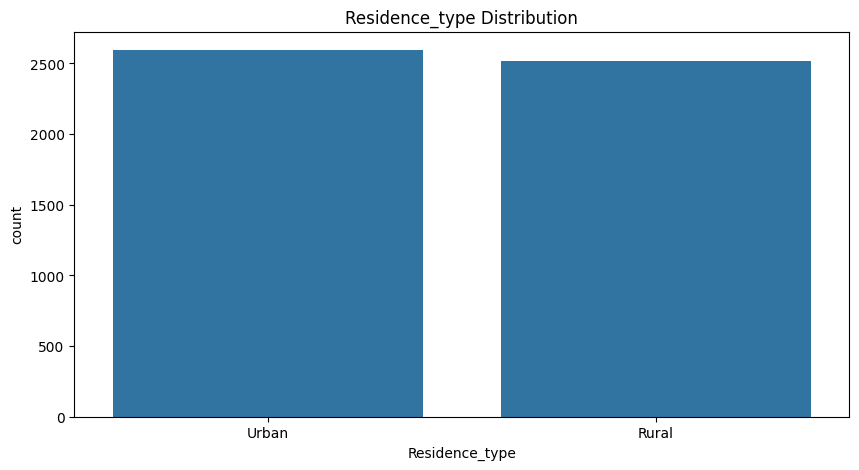

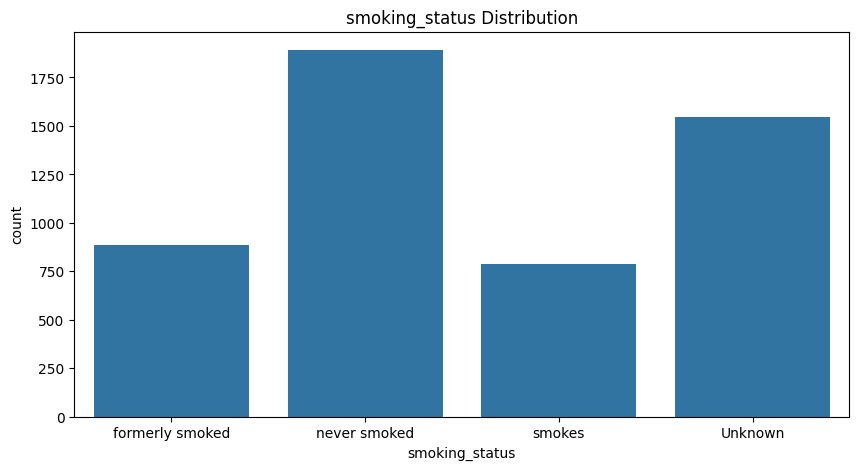

In [10]:
# Categorical Variable Analysis

for column in categorical_columns:
	plt.figure(figsize=(10, 5))
	sns.countplot(x=column, data=dataset)
	plt.title(f'{column} Distribution')
	plt.show()


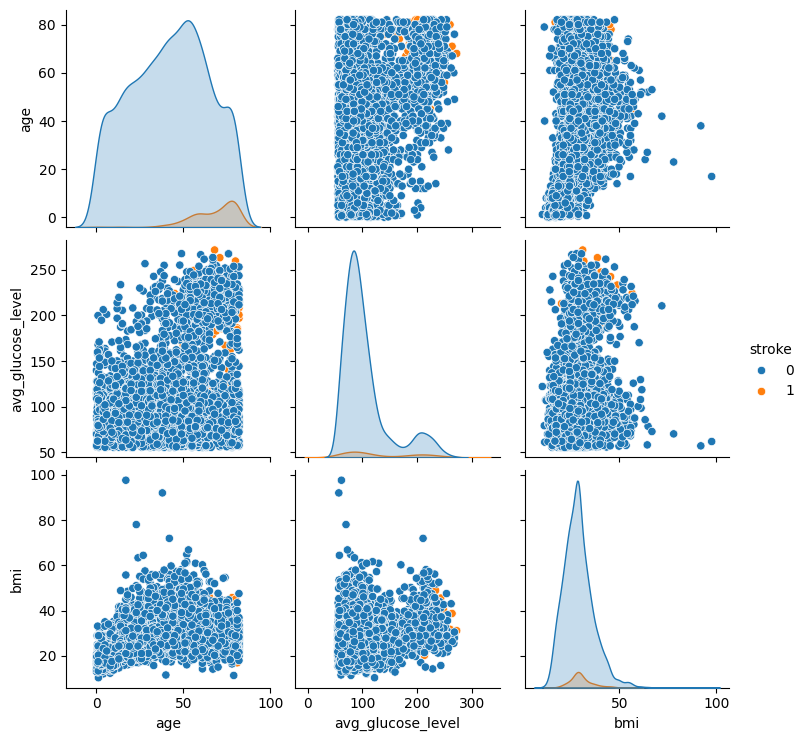

In [11]:
# Multivariate Analysis
sns.pairplot(dataset[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue='stroke')
plt.show()

## Step 2: Feature Engineering, Creating Train, and Test Datasets

In [12]:
# Feature Engineering
# Convert categorical variables to dummy variables
data = pd.get_dummies(
    dataset,
    columns=[
        'gender', 'ever_married', 'work_type',
        'Residence_type', 'smoking_status',
    ],
)

# Split features and target variable
X = data.drop('stroke', axis=1)
y = data['stroke']

# Create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 3: Apply at least 4 algorithms (Training and Testing)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train and test classifiers
for name, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train)
    train_score = classifier.score(X_train_scaled, y_train)
    test_score = classifier.score(X_test_scaled, y_test)
    print(f'{name}: Training Accuracy - {train_score}, Testing Accuracy - {test_score}')


Logistic Regression: Training Accuracy - 0.9545009784735812, Testing Accuracy - 0.9393346379647749
Decision Tree: Training Accuracy - 1.0, Testing Accuracy - 0.9080234833659491
Random Forest: Training Accuracy - 1.0, Testing Accuracy - 0.9383561643835616
Support Vector Machine: Training Accuracy - 0.9547455968688845, Testing Accuracy - 0.9393346379647749


## Step 4: Generate at least 4 Evaluation Metrics on each algorithm

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate classifiers
evaluation_metrics = {}

for name, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division= 1)
    recall = recall_score(y_test, y_pred, average=None, zero_division=1)
    f1 = f1_score(y_test, y_pred,average=None, zero_division= 1)

    evaluation_metrics[name] = {
        'Accuracy': acc, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

    print(f'{name}')
    print(f'Accuracy - {acc}')
    print(f'Precision - {precision}')
    print(f'Recall - {recall}')
    print(f'F1 Score - {f1}')
    print()
    print()

Logistic Regression
Accuracy - 0.9393346379647749
Precision - 1.0
Recall - [1. 0.]
F1 Score - [0.96871847 0.        ]


Decision Tree
Accuracy - 0.9148727984344422
Precision - 0.2549019607843137
Recall - [0.96041667 0.20967742]
F1 Score - [0.95494562 0.2300885 ]


Random Forest
Accuracy - 0.9393346379647749
Precision - 0.5
Recall - [0.99895833 0.01612903]
F1 Score - [0.96868687 0.03125   ]


Support Vector Machine
Accuracy - 0.9393346379647749
Precision - 1.0
Recall - [1. 0.]
F1 Score - [0.96871847 0.        ]




## Step 5: Comparing the results.

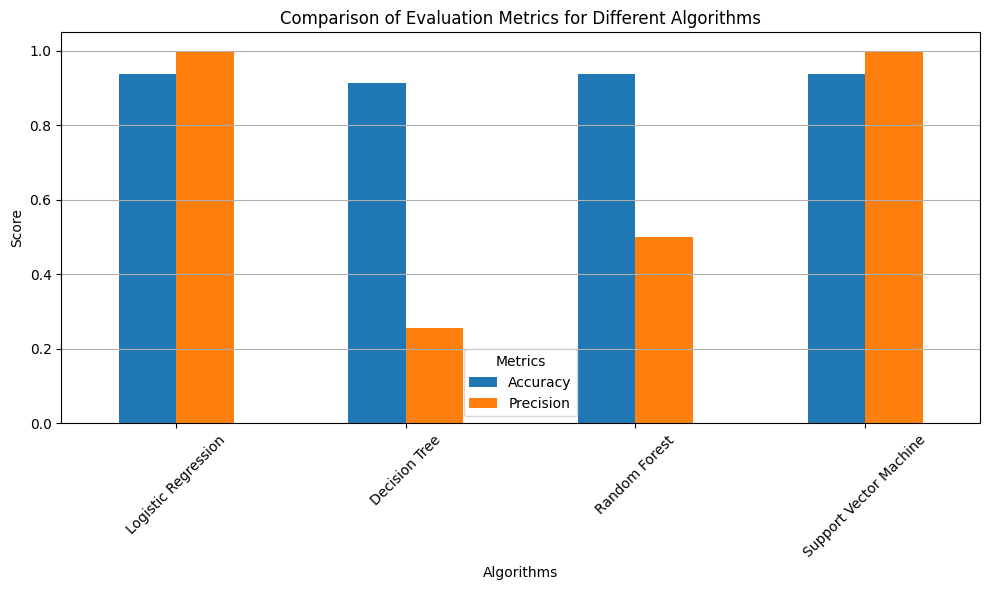

In [15]:
# Visualize the performance of each algorithm
metrics_df = pd.DataFrame(evaluation_metrics).T
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Evaluation Metrics for Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Step 6: Fine Tune the best algorithm.

In [19]:
best_algorithm = max(
    evaluation_metrics, key=lambda x: evaluation_metrics[x]['Accuracy'])
print(f'The best algorithm is {best_algorithm}')


The best algorithm is Logistic Regression


In [20]:
from sklearn.model_selection import GridSearchCV

# Fine-tune the hyperparameters of the selected algorithm
if best_algorithm == 'Logistic Regression':
    params = {
        'C': [0.1, 1, 10, 100],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
    model = LogisticRegression()
elif best_algorithm == 'Decision Tree':
    params = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [10, 50, 100, 500]
    }
    model = DecisionTreeClassifier()
elif best_algorithm == 'Random Forest':
    params = {
        'n_estimators': [100, 500, 1000],
        'max_depth': [10, 50, 100, 500]
    }
    model = RandomForestClassifier()
elif best_algorithm == 'Support Vector Machine':
    params = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
    model = SVC()

grid_search = GridSearchCV(model, param_grid=params, cv=5)
grid_search.fit(X_train_scaled, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')
print(f'Test Score: {grid_search.score(X_test_scaled, y_test)}')



/Users/meheraj/Documents/Development/Misc/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meheraj/Documents/Development/Misc/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meheraj/Documents/Development/Misc/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meheraj/Documents/Development/Misc/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meheraj/Documents/Development/Misc/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'C': 0.1, 'solver': 'newton-cg'}
Best Score: 0.9545010818397561
Test Score: 0.9393346379647749


/Users/meheraj/Documents/Development/Misc/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meheraj/Documents/Development/Misc/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/meheraj/Documents/Development/Misc/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
